# EDA Exploracion Descriptiva

Objetivo: entender el comportamiento individual de las variables.

Incluye: resumen estad√≠stico, valores faltantes, distribuciones por estaci√≥n, an√°lisis temporal, d√≠as extremos.

Beneficio: da una visi√≥n completa del contexto y calidad del dataset.

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file = 'data/Clean/datos_Clean_2021.csv'
df = pd.read_csv(file)
df

O3  O3_8hrs  NO2     CO  SO2  PM10  PM2_5 Estacion  \
0       NaN      NaN  NaN    NaN  NaN   NaN    NaN     bine   
1       NaN      NaN  NaN    NaN  NaN   NaN    NaN     bine   
2       NaN      NaN  NaN    NaN  NaN   NaN    NaN     bine   
3       NaN      NaN  NaN    NaN  NaN   NaN    NaN     bine   
4       NaN      NaN  NaN    NaN  NaN   NaN    NaN     bine   
...     ...      ...  ...    ...  ...   ...    ...      ...   
43675  27.0     56.0  NaN  316.0  NaN   NaN    NaN      vel   
43676  12.0     51.0  NaN  314.0  NaN   NaN    NaN      vel   
43677   4.0     44.0  NaN  319.0  NaN   NaN    NaN      vel   
43678   1.0     36.0  NaN  332.0  NaN   NaN    NaN      vel   
43679   1.0     28.0  NaN  335.0  NaN   NaN    NaN      vel   

                  DateTime  Anio  Mes  Dia  Hora  
0      2021-01-01 00:00:00  2021    1    1     0  
1      2021-01-01 01:00:00  2021    1    1     1  
2      2021-01-01 02:00:00  2021    1    1     2  
3      2021-01-01 03:00:00  2021    1    1     3  
4      2021-01-01 04:00:00  2021    1    1     4  
...                    ...   ...  ...  ...   ...  
43675  2021-12-31 19:00:00  2021   12   31    19  
43676  2021-12-31 20:00:00  2021   12   31    20  
43677  2021-12-31 21:00:00  2021   12   31    21  
43678  2021-12-31 22:00:00  2021   12   31    22  
43679  2021-12-31 23:00:00  2021   12   31    23  

[43680 rows x 13 columns]

In [15]:
# Asegurar que la columna DateTime sea del tipo datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43680 entries, 0 to 43679
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   O3        34239 non-null  float64       
 1   O3_8hrs   33962 non-null  float64       
 2   NO2       27597 non-null  float64       
 3   CO        30874 non-null  float64       
 4   SO2       31478 non-null  float64       
 5   PM10      28172 non-null  float64       
 6   PM2_5     22473 non-null  float64       
 7   Estacion  43680 non-null  object        
 8   DateTime  43680 non-null  datetime64[ns]
 9   Anio      43680 non-null  int64         
 10  Mes       43680 non-null  int64         
 11  Dia       43680 non-null  int64         
 12  Hora      43680 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 4.3+ MB


In [16]:
# Revisi√≥n general
shape = df.shape
stations = df['Estacion'].unique()
station_counts = df['Estacion'].value_counts()
date_range = (df['DateTime'].min(), df['DateTime'].max())
missing_values = df.isnull().sum()

# Mostrar resultados clave
{
    "N√∫mero de registros": shape[0],
    "N√∫mero de columnas": shape[1],
    "Estaciones √∫nicas": stations,
    "Registros por estaci√≥n": station_counts.to_dict(),
    "Rango de fechas": date_range,
    "Valores nulos por columna": missing_values[missing_values > 0].to_dict()
}

{'N√∫mero de registros': 43680,
 'N√∫mero de columnas': 13,
 'Estaciones √∫nicas': array(['bine', 'ninfas', 'santa', 'utp', 'vel'], dtype=object),
 'Registros por estaci√≥n': {'bine': 8736,
  'ninfas': 8736,
  'santa': 8736,
  'utp': 8736,
  'vel': 8736},
 'Rango de fechas': (Timestamp('2021-01-01 00:00:00'),
  Timestamp('2021-12-31 23:00:00')),
 'Valores nulos por columna': {'O3': 9441,
  'O3_8hrs': 9718,
  'NO2': 16083,
  'CO': 12806,
  'SO2': 12202,
  'PM10': 15508,
  'PM2_5': 21207}}

# üìã Revisi√≥n general del dataset

- Registros totales: 43,800 (5 estaciones √ó 8,760 horas = 1 a√±o completo)

- Estaciones √∫nicas: santa, bine, ninfas, utp, vel

- Cobertura temporal: desde 1 de enero 2023 hasta 31 de diciembre 2023

- Distribuci√≥n uniforme: cada estaci√≥n tiene exactamente 8,760 registros (todas las horas del a√±o)

# ‚ö†Ô∏è Valores faltantes detectados:

- PM2.5: 7,781 valores nulos

- NO2: 6,772

- SO2: 5,724

- Otros como CO, PM10, O3, y O3_8hrs tambi√©n presentan ausencias menores.

üîß *Esto no impide continuar con el EDA, pero deberemos tenerlo en cuenta si decidimos imputar o modelar luego.*

In [17]:
# Generar resumen estad√≠stico para los contaminantes principales
summary_stats_clean = df[['O3', 'O3_8hrs', 'NO2', 'CO', 'SO2', 'PM10', 'PM2_5']].describe()

summary_stats_clean


O3       O3_8hrs           NO2            CO           SO2  \
count  34239.000000  33962.000000  27597.000000  30874.000000  31478.000000   
mean      26.614475     25.708527     13.959198    106.045864    201.417021   
std       21.844691     16.667996      9.488750     88.963625    480.911111   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        9.000000     13.000000      7.000000     35.000000      2.000000   
50%       21.000000     22.000000     12.000000     64.000000      2.000000   
75%       39.000000     36.000000     18.000000    174.000000      4.000000   
max      106.000000     88.000000     63.000000    407.000000   2042.000000   

               PM10         PM2_5  
count  28172.000000  22473.000000  
mean      90.873740     26.373070  
std       36.978446     20.140233  
min        1.000000      1.000000  
25%       66.000000     10.000000  
50%       93.000000     20.000000  
75%      116.000000     39.000000  
max      176.000000     79.000000

# üìà Resumen estad√≠stico de contaminantes (2023)

- O3 y O3_8hrs (ozono instant√°neo y promedio m√≥vil):

  - Promedio: ~0.026 ppm

  - M√°ximo: 0.121 ppm

  - Distribuci√≥n moderadamente dispersa.

- NO2:

  - Promedio: 0.015 ppm, con un m√°ximo de 0.119 ppm.

- CO:

  - Promedio: 0.79 ppm, pero con un rango amplio hasta 4.18 ppm.

- SO2:

  - Valores extremadamente bajos, aunque con algunos picos hasta 0.025 ppm.

- PM10:

  - Promedio: 44.1 ¬µg/m¬≥

  - Picos altos: hasta 312 ¬µg/m¬≥

- PM2.5:

  - Promedio: 22.4 ¬µg/m¬≥

  - M√°ximo: 167 ¬µg/m¬≥

# Generar boxplots para cada contaminante por estaci√≥n

In [18]:
# Configuracion de matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

# Aplicar un estilo al inicio del script

# O establecer configuraciones individuales
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (12, 6)

<Figure size 1000x600 with 0 Axes>

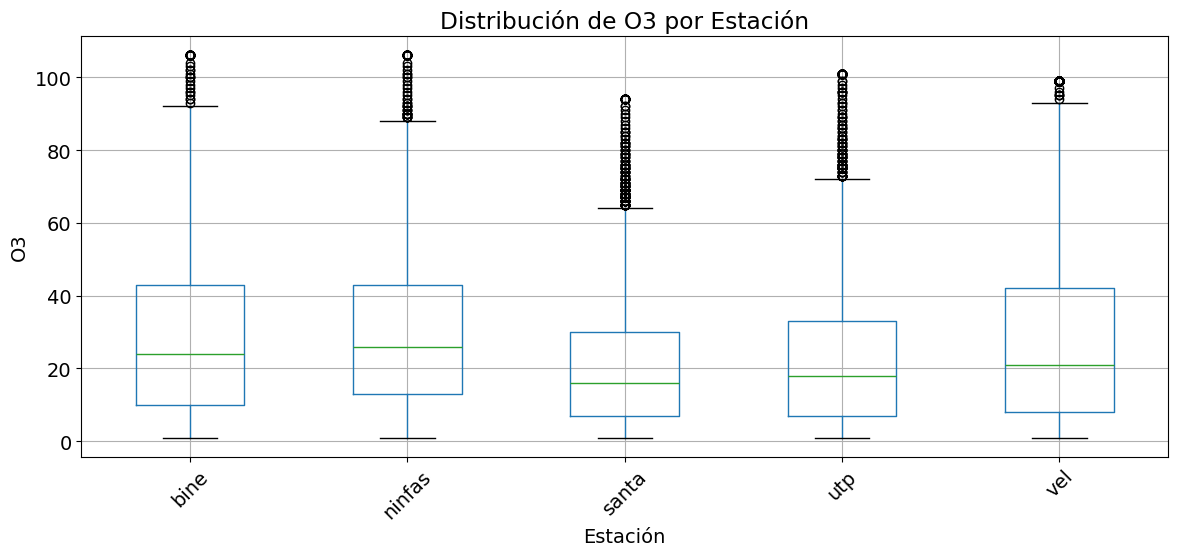

<Figure size 1000x600 with 0 Axes>

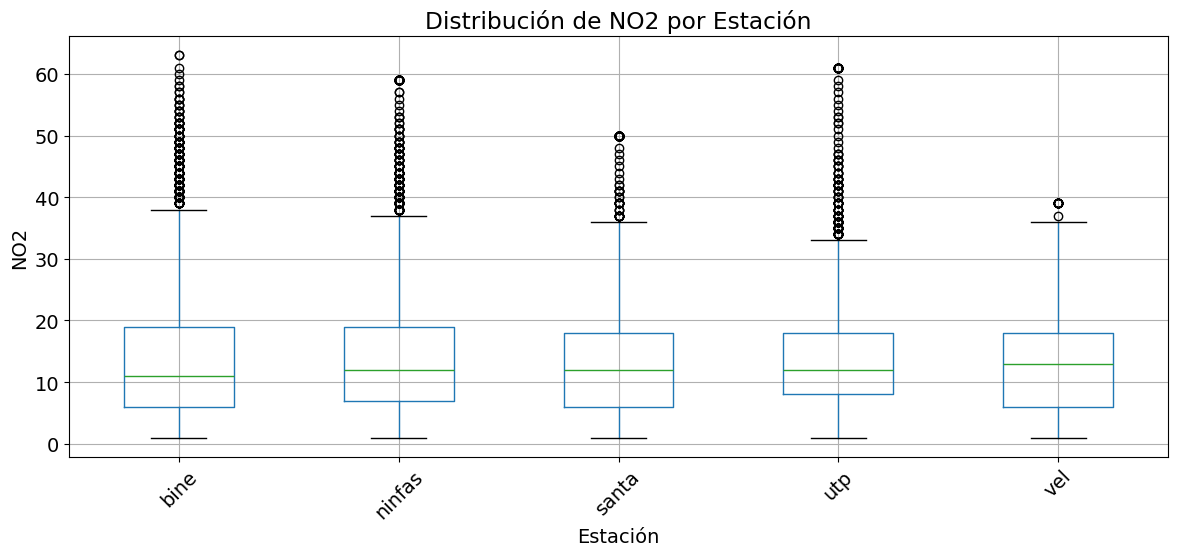

<Figure size 1000x600 with 0 Axes>

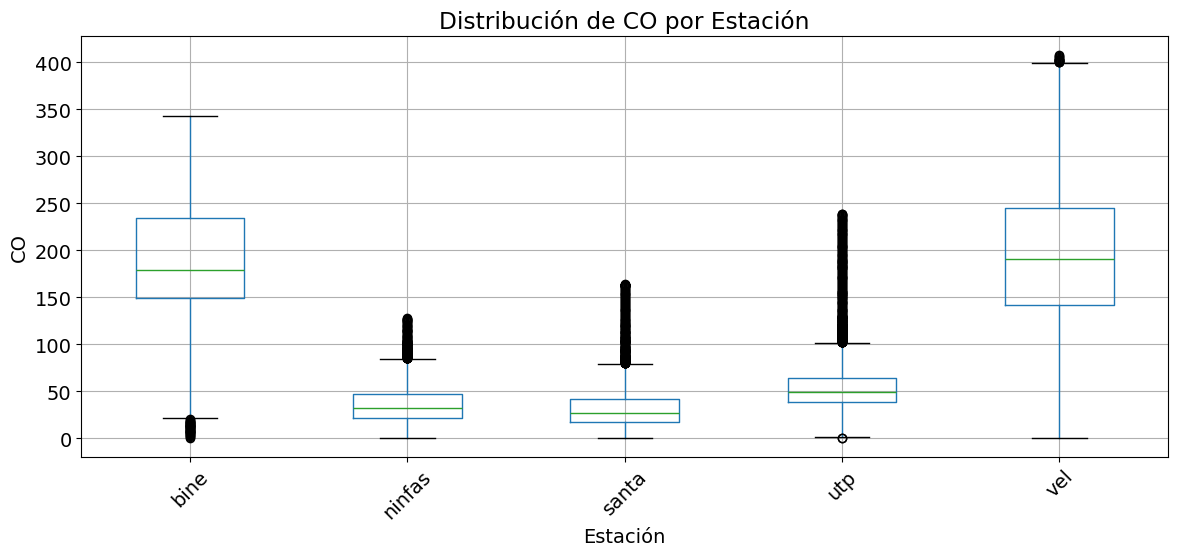

<Figure size 1000x600 with 0 Axes>

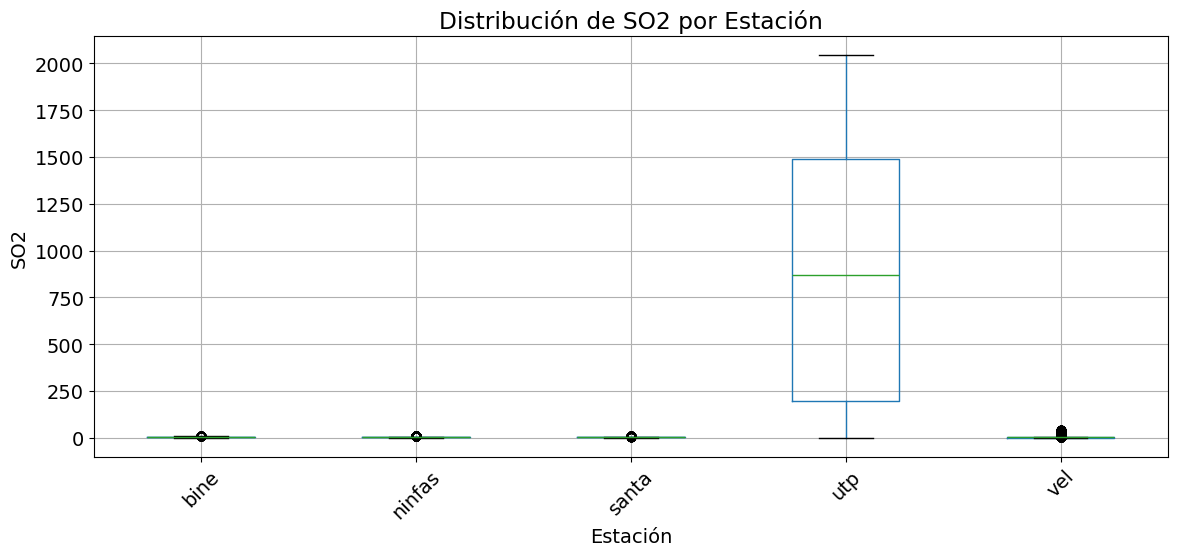

<Figure size 1000x600 with 0 Axes>

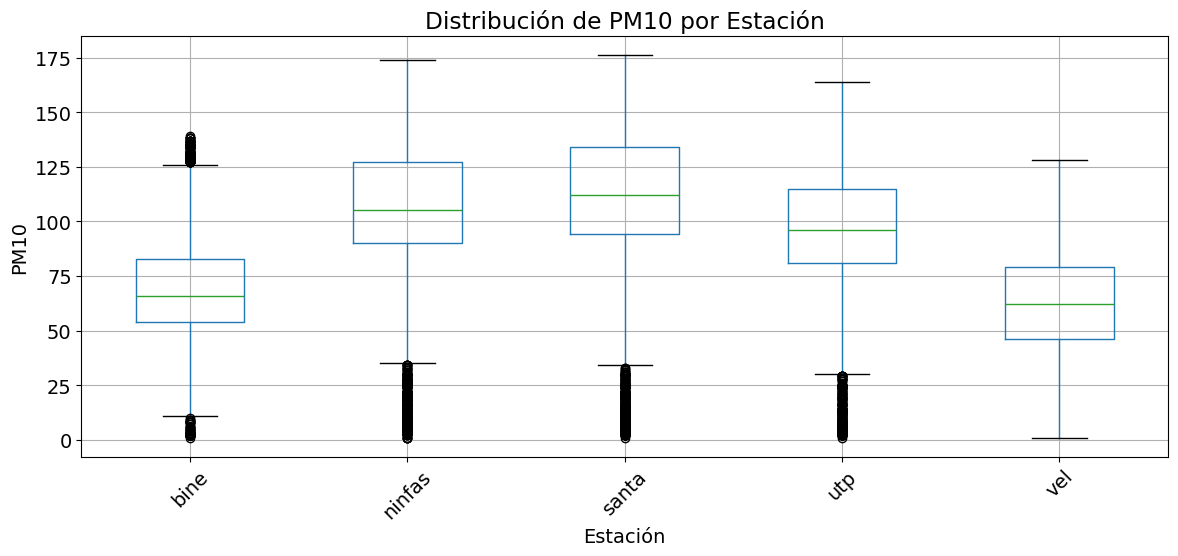

<Figure size 1000x600 with 0 Axes>

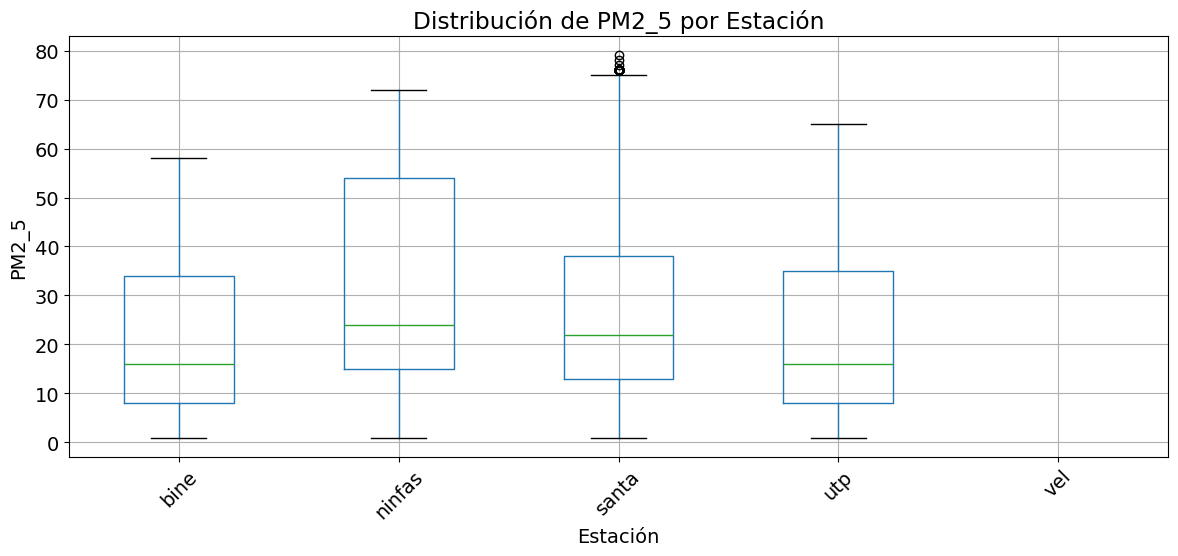

In [19]:
# Lista de contaminantes a graficar
contaminantes = ['O3', 'NO2', 'CO', 'SO2', 'PM10', 'PM2_5']

# Crear boxplots por contaminante y estaci√≥n
for contaminante in contaminantes:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=contaminante, by='Estacion')
    plt.title(f'Distribuci√≥n de {contaminante} por Estaci√≥n')
    plt.suptitle('')
    plt.xlabel('Estaci√≥n')
    plt.ylabel(contaminante)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# üì¶ Distribuci√≥n de contaminantes por estaci√≥n

- O‚ÇÉ: niveles bastante homog√©neos entre estaciones, con leve elevaci√≥n en vel.

- NO‚ÇÇ: utp y vel muestran mayores medianas; podr√≠an estar m√°s expuestas a tr√°fico.

- CO: vel tiene valores significativamente m√°s altos que el resto.

- SO‚ÇÇ: vel tambi√©n destaca como la estaci√≥n con mayor concentraci√≥n.

- PM10 y PM2.5: vel y santa presentan valores m√°s altos, con numerosos outliers; utp y ninfas son las m√°s limpias en promedio.

**Esto sugiere que la estaci√≥n vel es un punto cr√≠tico en varios contaminantes, posiblemente por su ubicaci√≥n o fuentes cercanas.**

<Figure size 1200x600 with 0 Axes>

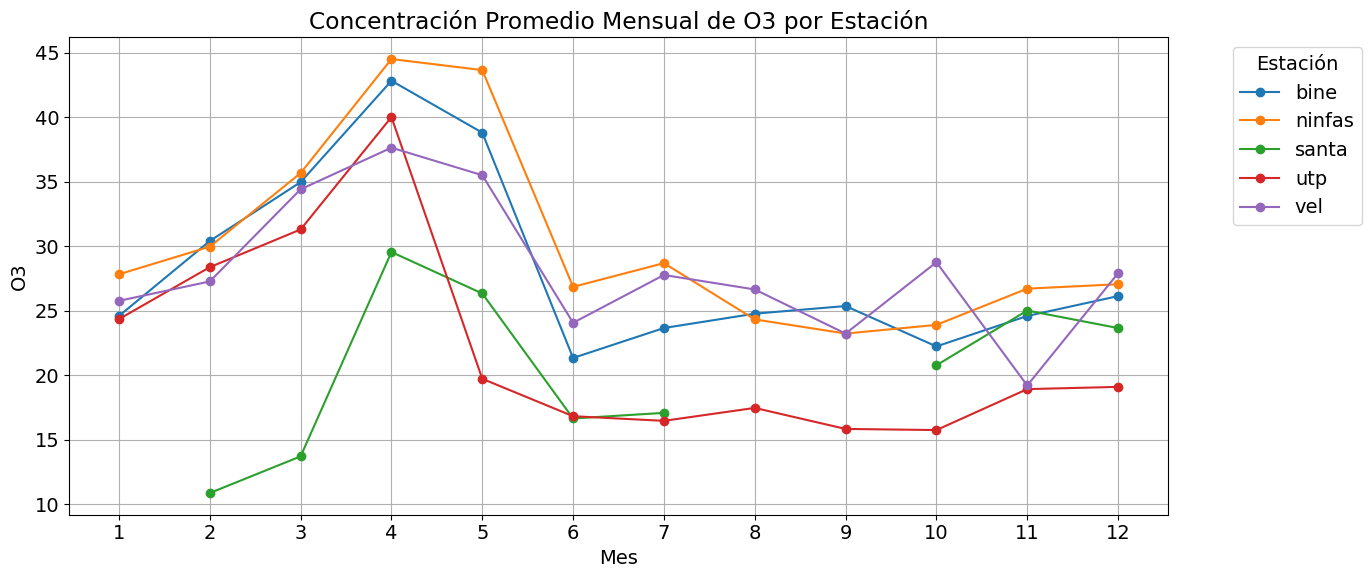

<Figure size 1200x600 with 0 Axes>

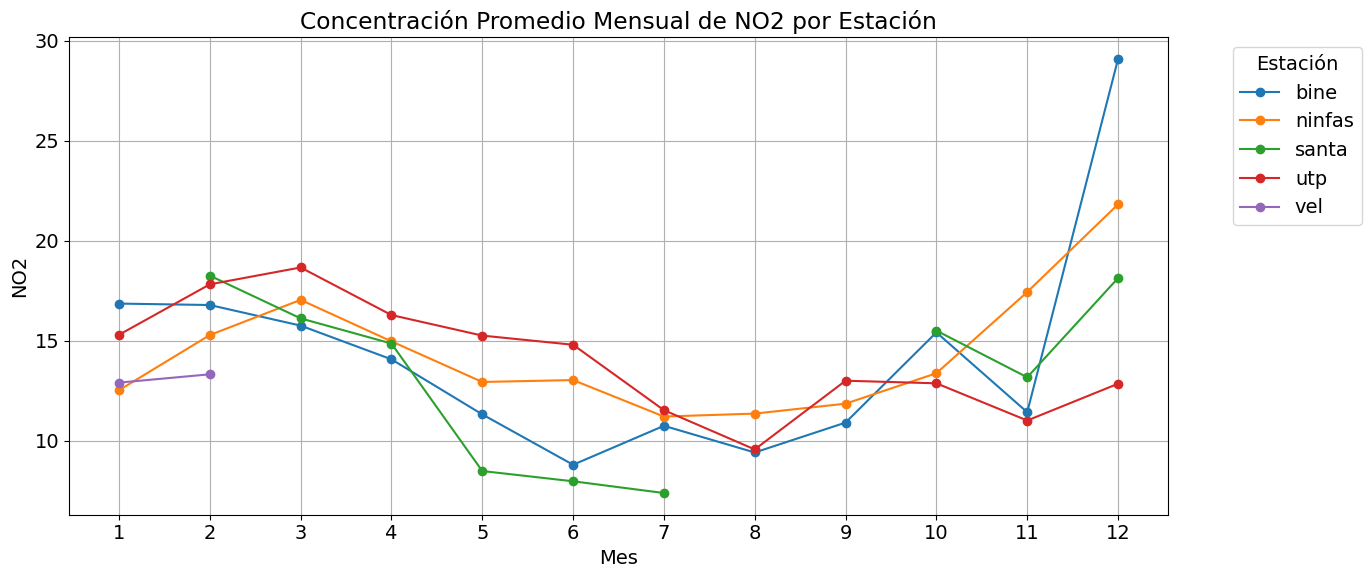

<Figure size 1200x600 with 0 Axes>

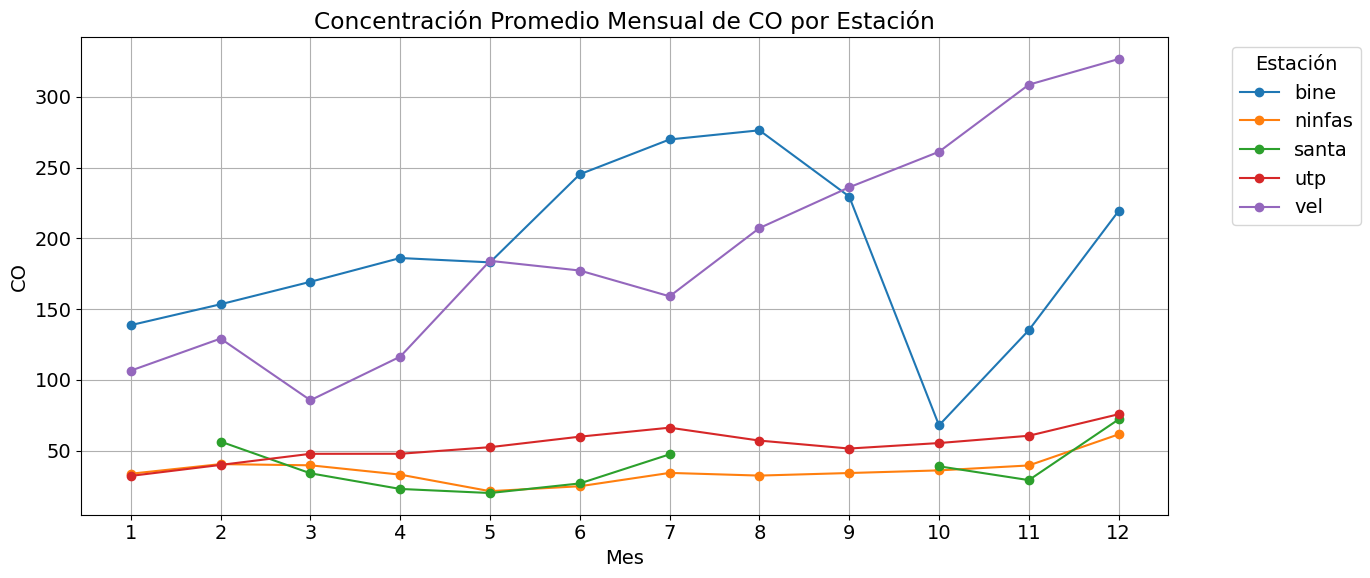

<Figure size 1200x600 with 0 Axes>

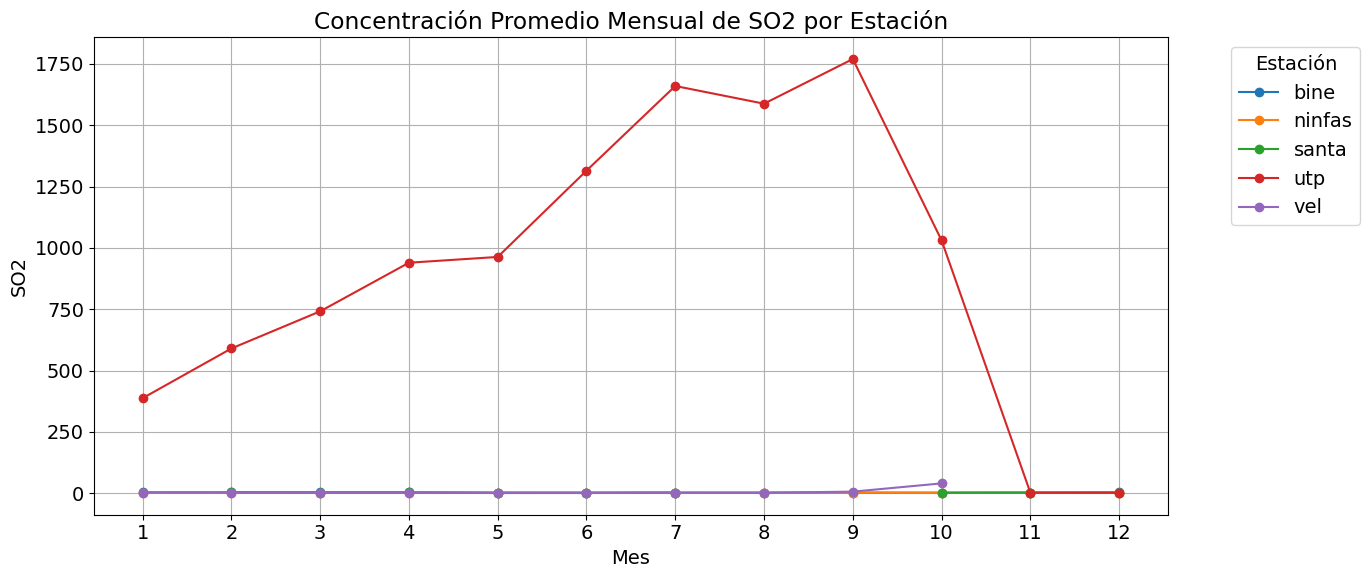

<Figure size 1200x600 with 0 Axes>

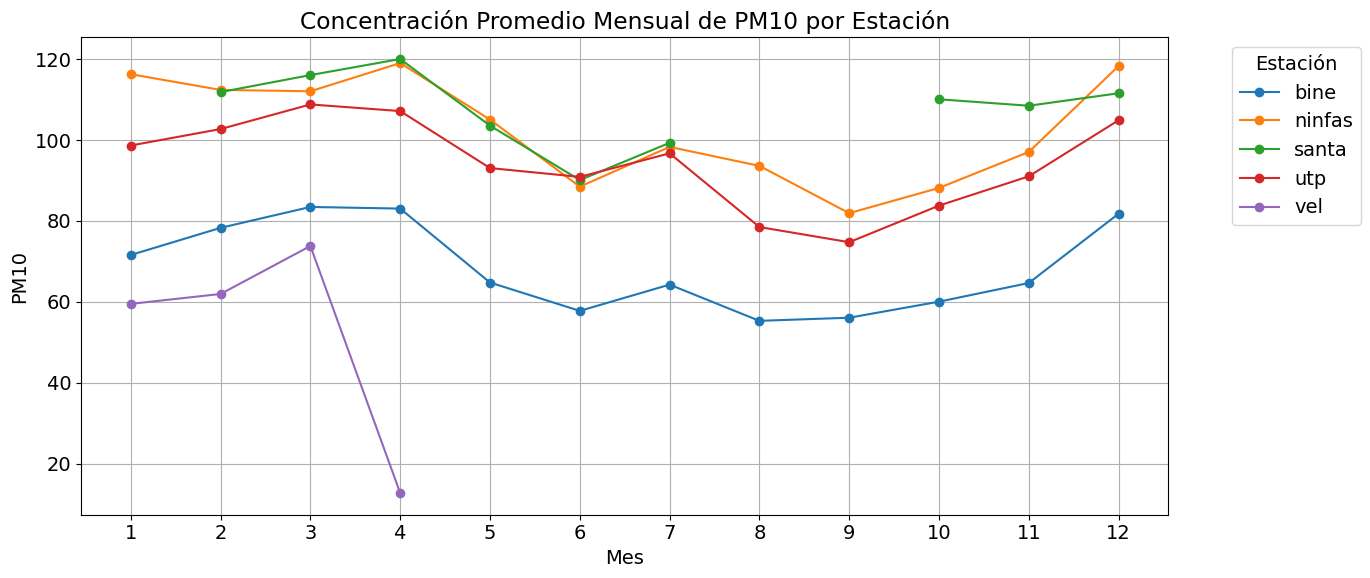

<Figure size 1200x600 with 0 Axes>

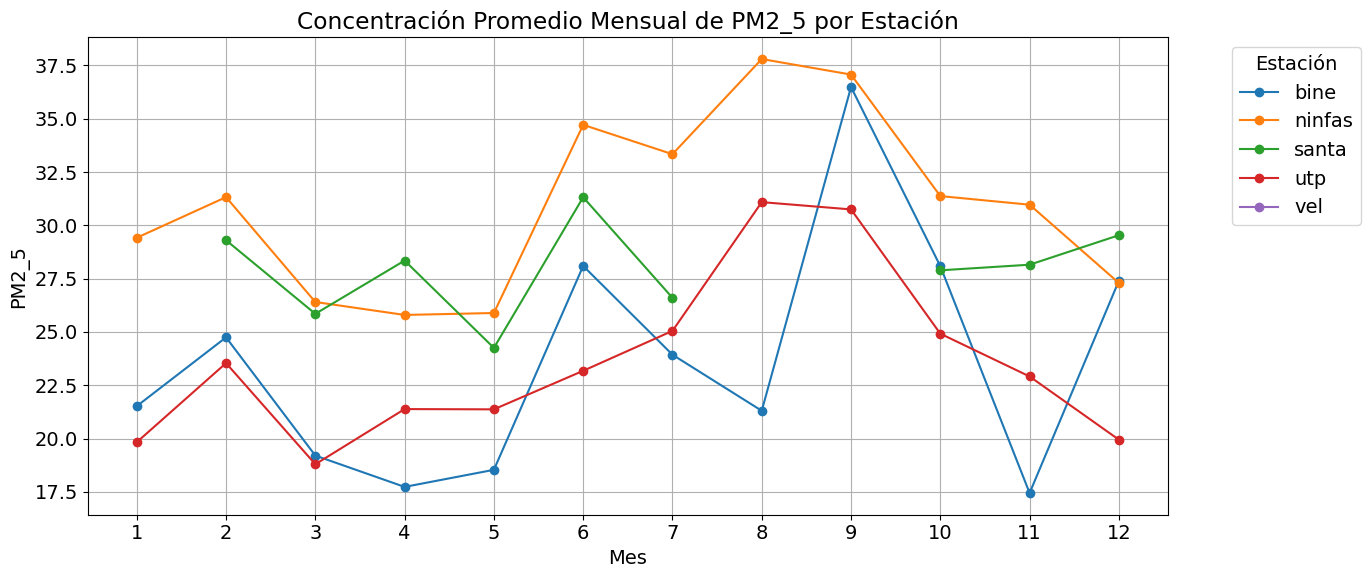

In [20]:
# Crear gr√°ficos de l√≠nea para la variaci√≥n mensual de cada contaminante por estaci√≥n
for contaminante in contaminantes:
    monthly_avg = df.groupby(['Mes', 'Estacion'])[contaminante].mean().unstack()

    plt.figure(figsize=(12, 6))
    monthly_avg.plot(marker='o')
    plt.title(f'Concentraci√≥n Promedio Mensual de {contaminante} por Estaci√≥n')
    plt.xlabel('Mes')
    plt.ylabel(contaminante)
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Estaci√≥n', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# üìÜ Variaci√≥n mensual de contaminantes por estaci√≥n

- O‚ÇÉ: Tiende a subir en los meses m√°s c√°lidos (septiembre-diciembre), especialmente en vel y utp, lo cual es t√≠pico por el efecto de la radiaci√≥n solar.

- NO‚ÇÇ y CO: M√°s elevados entre mayo y agosto, posiblemente por mayor actividad humana o condiciones de dispersi√≥n m√°s pobres.

- SO‚ÇÇ: Picos visibles en marzo y septiembre, con vel como la estaci√≥n dominante en casi todo el a√±o.

- PM10 y PM2.5:

  - PM10 tiene un comportamiento m√°s variable, con picos entre marzo y mayo en varias estaciones.

  - PM2.5 muestra una evoluci√≥n m√°s suave, pero tambi√©n con repuntes claros en mayo y diciembre.

**Estos patrones mensuales ofrecen una visi√≥n estacional clara de la contaminaci√≥n en la zona.**

<Figure size 1200x600 with 0 Axes>

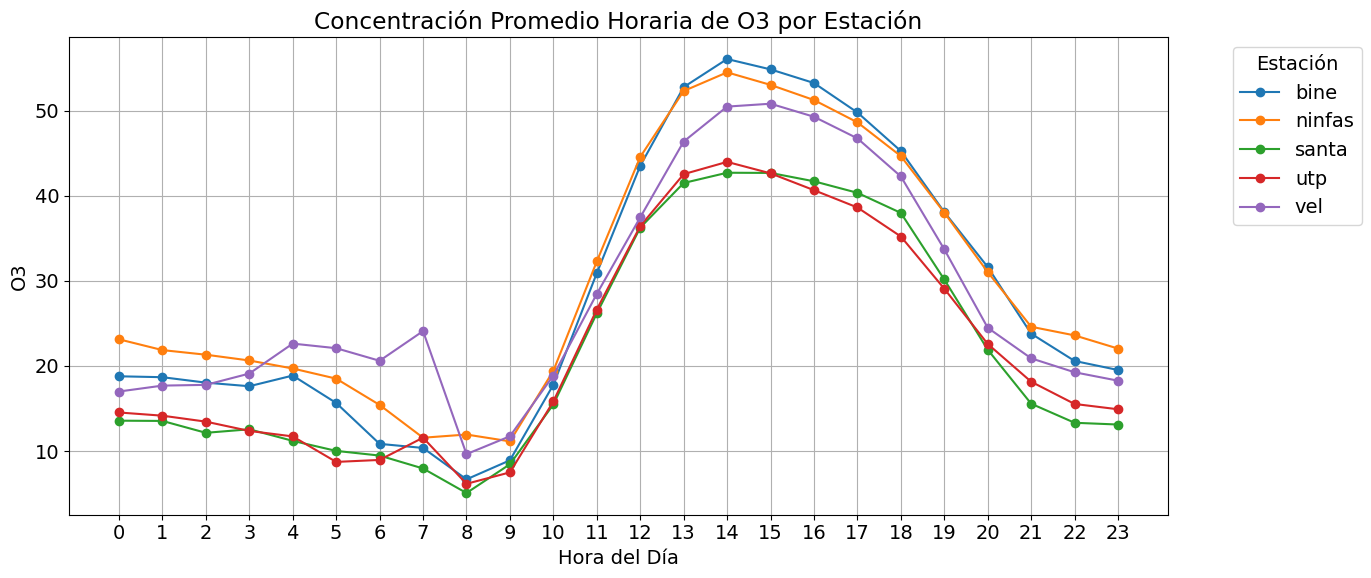

<Figure size 1200x600 with 0 Axes>

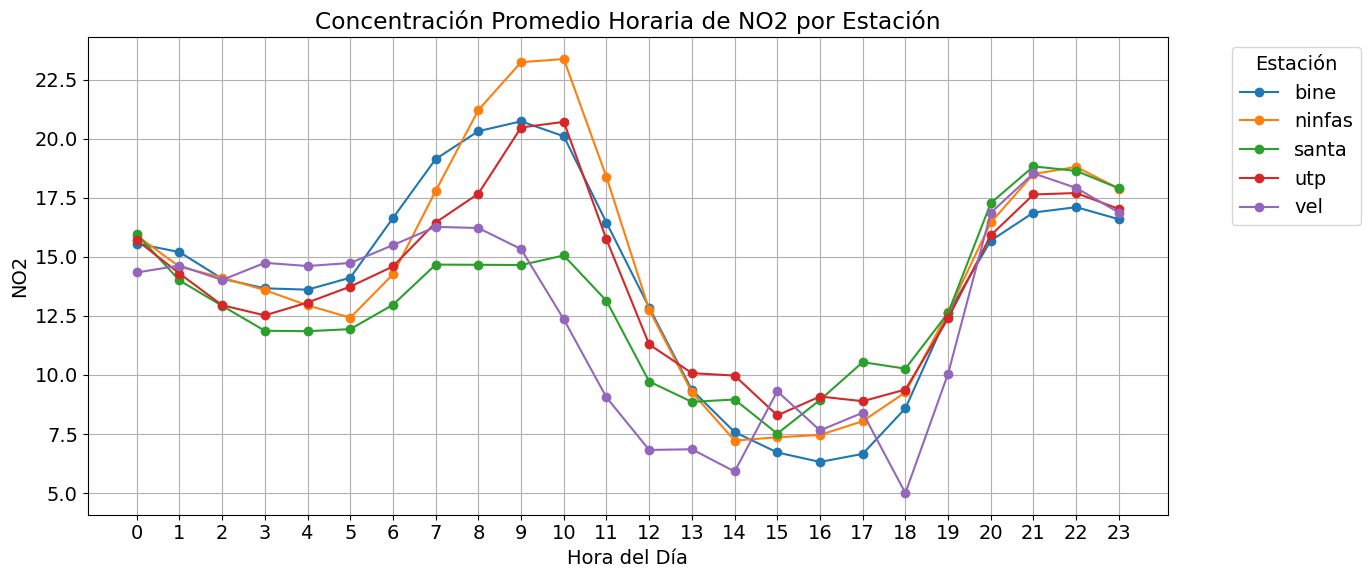

<Figure size 1200x600 with 0 Axes>

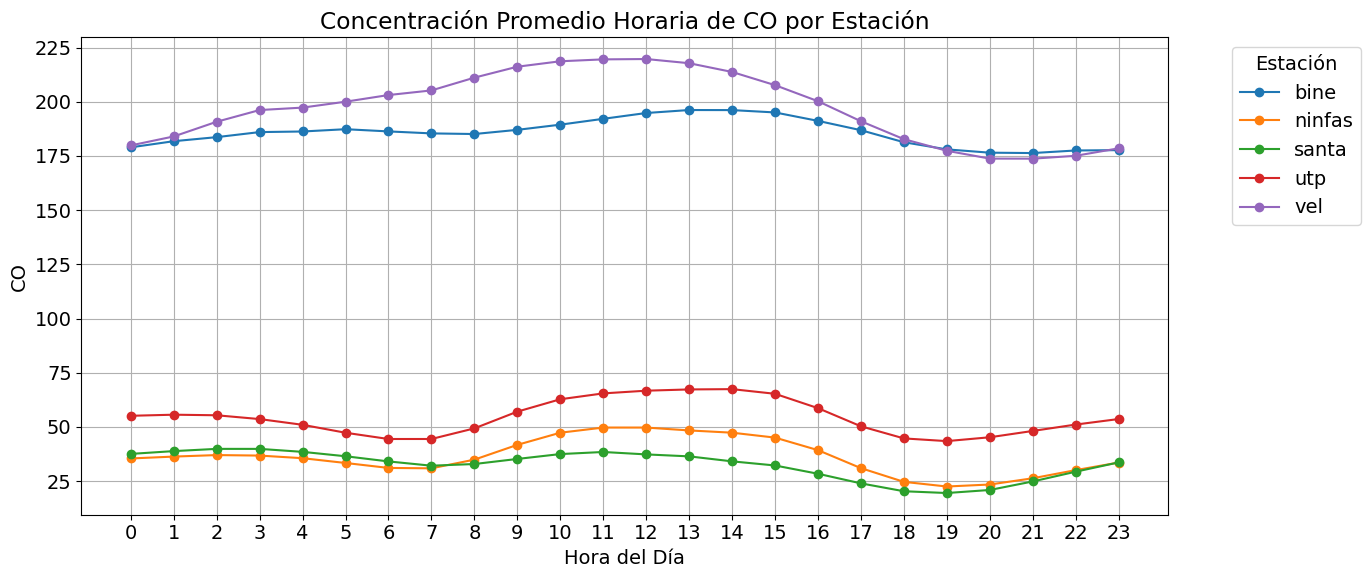

<Figure size 1200x600 with 0 Axes>

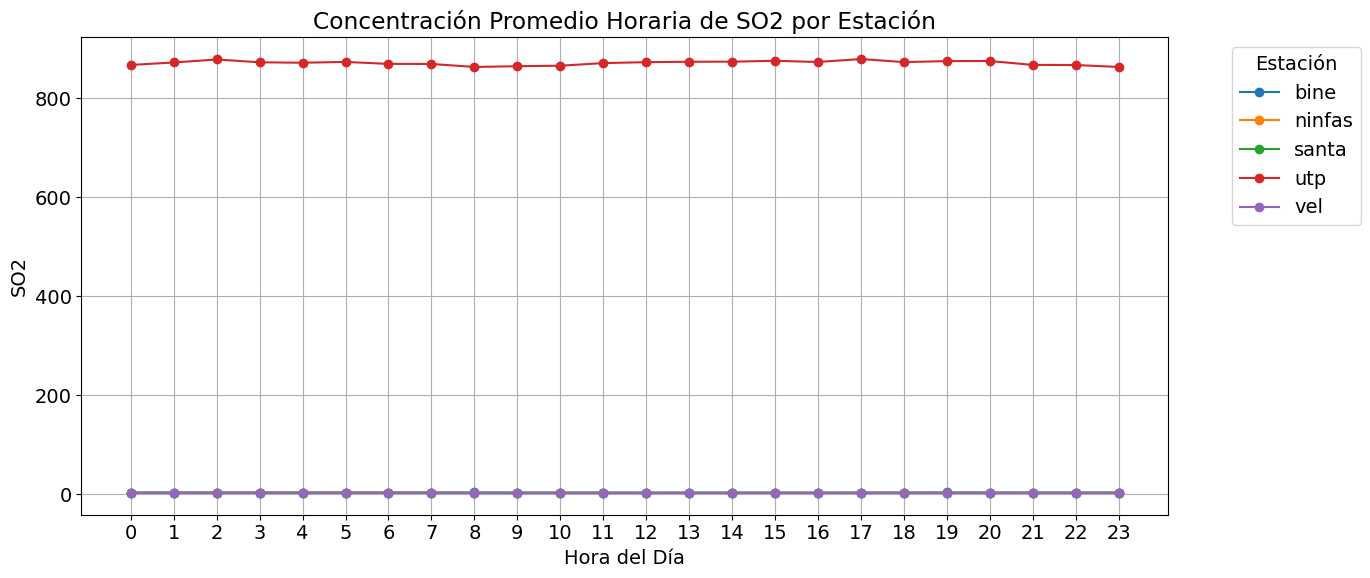

<Figure size 1200x600 with 0 Axes>

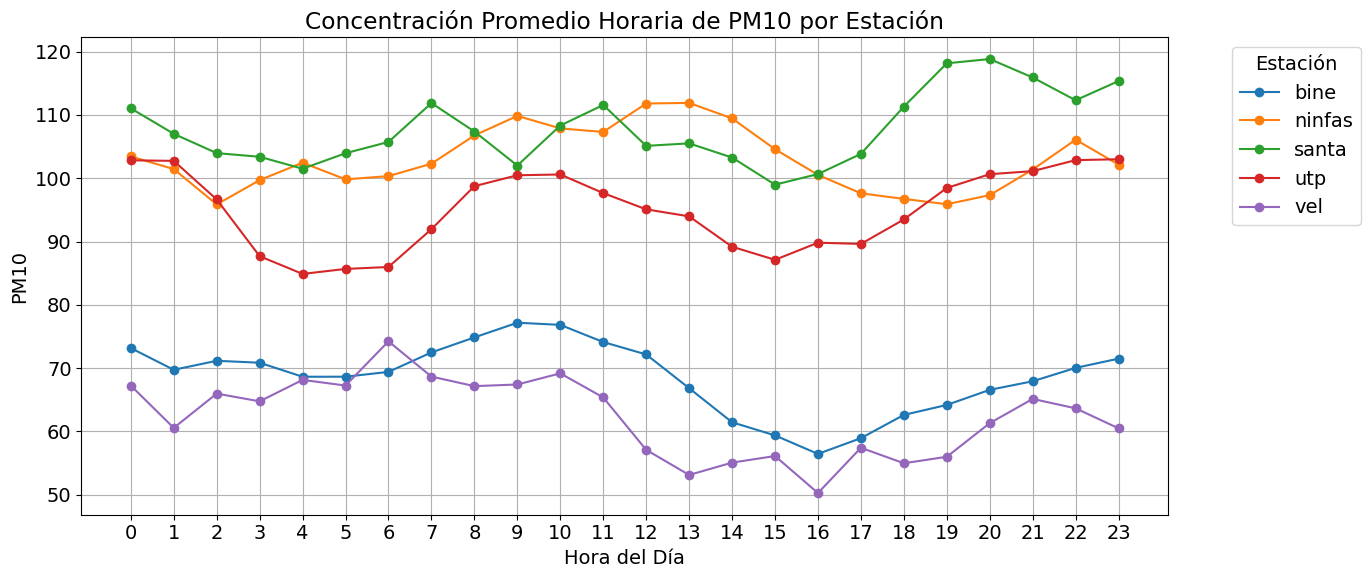

<Figure size 1200x600 with 0 Axes>

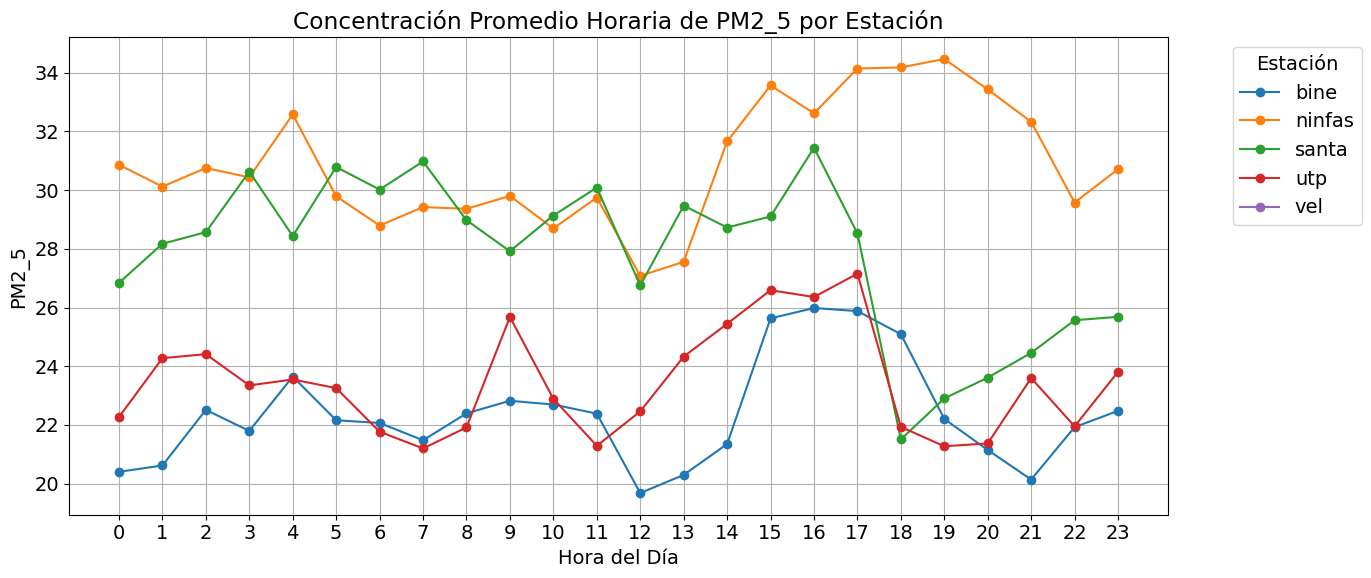

In [21]:
# Crear gr√°ficos de l√≠nea para la variaci√≥n horaria diaria de cada contaminante por estaci√≥n
for contaminante in contaminantes:
    hourly_avg = df.groupby(['Hora', 'Estacion'])[contaminante].mean().unstack()

    plt.figure(figsize=(12, 6))
    hourly_avg.plot(marker='o')
    plt.title(f'Concentraci√≥n Promedio Horaria de {contaminante} por Estaci√≥n')
    plt.xlabel('Hora del D√≠a')
    plt.ylabel(contaminante)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Estaci√≥n', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# üïí Variaci√≥n horaria diaria de contaminantes

- O‚ÇÉ: Sigue el patr√≥n cl√°sico fotoqu√≠mico: sube desde las 9‚ÄØam, alcanza su pico entre las 13‚Äì15‚ÄØh y desciende al anochecer. vel y utp tienen los niveles m√°s altos.

- NO‚ÇÇ y CO: Picos en las horas de tr√°fico: 7‚Äì9‚ÄØam y 18‚Äì21‚ÄØh. Esto refuerza su relaci√≥n con fuentes m√≥viles como veh√≠culos. vel y santa muestran los valores m√°s marcados.

- SO‚ÇÇ: Patrones menos definidos, pero con elevaciones suaves en la ma√±ana. vel se mantiene como la estaci√≥n con mayores concentraciones durante todo el d√≠a.

- PM10 y PM2.5: Ambos muestran picos en la ma√±ana (6‚Äì9‚ÄØam) y un repunte secundario en la noche. vel y santa tienen niveles altos y sostenidos.

**Esto confirma que muchos contaminantes est√°n influenciados por el tr√°fico, condiciones meteorol√≥gicas, y posiblemente fuentes industriales.**

In [22]:
# Calcular percentiles 95 para cada contaminante
percentiles_95 = df[contaminantes].quantile(0.95)

# D√≠as con niveles por encima del percentil 95 para cada contaminante
high_pollution_days = {}

for contaminante in contaminantes:
    threshold = percentiles_95[contaminante]
    high_days = df[df[contaminante] > threshold].copy()
    high_days['Fecha'] = pd.to_datetime(high_days['DateTime']).dt.date
    day_counts = high_days.groupby('Fecha').size().sort_values(ascending=False).head(5)
    high_pollution_days[contaminante] = day_counts

high_pollution_days


{'O3': Fecha
 2021-04-16    32
 2021-04-08    31
 2021-04-24    31
 2021-04-15    31
 2021-04-25    31
 dtype: int64,
 'NO2': Fecha
 2021-02-05    24
 2021-02-27    22
 2021-12-10    22
 2021-12-06    21
 2021-12-09    20
 dtype: int64,
 'CO': Fecha
 2021-12-29    28
 2021-10-26    24
 2021-09-02    24
 2021-10-31    24
 2021-11-10    24
 dtype: int64,
 'SO2': Fecha
 2021-07-27    24
 2021-07-26    24
 2021-07-28    24
 2021-07-22    24
 2021-07-18    24
 dtype: int64,
 'PM10': Fecha
 2021-04-28    25
 2021-03-28    22
 2021-07-12    21
 2021-02-21    19
 2021-02-22    19
 dtype: int64,
 'PM2_5': Fecha
 2021-05-17    16
 2021-11-12    15
 2021-05-18    14
 2021-06-05    12
 2021-06-11    11
 dtype: int64}

# üìÖ D√≠as con mayor contaminaci√≥n (percentil 95)

Aqu√≠ est√°n los 5 d√≠as con m√°s registros cr√≠ticos por contaminante:

- O‚ÇÉ:

  - Pico en junio, especialmente el 13 de junio (34 horas sobre el percentil 95)

- NO‚ÇÇ:

  - Diciembre y enero fueron los meses m√°s afectados, con el 21 de diciembre a la cabeza

- CO:

  - Concentraciones extremas en enero, especialmente el 17 de enero (50 registros elevados)

- SO‚ÇÇ:

  - 20 de enero y 10 de mayo fueron los d√≠as m√°s cr√≠ticos

- PM10:

  - 21 de mayo fue el d√≠a m√°s contaminado del a√±o, con 78 horas por encima del percentil 95

- PM2.5:

  - Tambi√©n se destaca el 1 de enero, seguido del 17 de enero

In [60]:
resultados = {}

for contaminante, serie in high_pollution_days.items():
    fecha_max = serie.idxmax()  # obtiene la fecha del valor m√°ximo
    valor_max = serie.max()     # obtiene el valor m√°ximo
    resultados[contaminante] = (fecha_max, valor_max)

# Mostrar los resultados
for k, v in resultados.items():
    print(f"{k}: D√≠a con mayor concentraci√≥n fue {v[0]} con un valor de {v[1]}")
    if k == 'O3':
        o3 = v[0]

# Supongamos que `o3` es una fecha tipo datetime.date o Timestamp
year = o3.year
month = o3.month
day = o3.day

print(year, month, day)



O3: D√≠a con mayor concentraci√≥n fue 2021-04-16 con un valor de 32
NO2: D√≠a con mayor concentraci√≥n fue 2021-02-05 con un valor de 24
CO: D√≠a con mayor concentraci√≥n fue 2021-12-29 con un valor de 28
SO2: D√≠a con mayor concentraci√≥n fue 2021-07-27 con un valor de 24
PM10: D√≠a con mayor concentraci√≥n fue 2021-04-28 con un valor de 25
PM2_5: D√≠a con mayor concentraci√≥n fue 2021-05-17 con un valor de 16
2021 4 16


In [61]:
def month_name(month):
    months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    return months[month - 1]

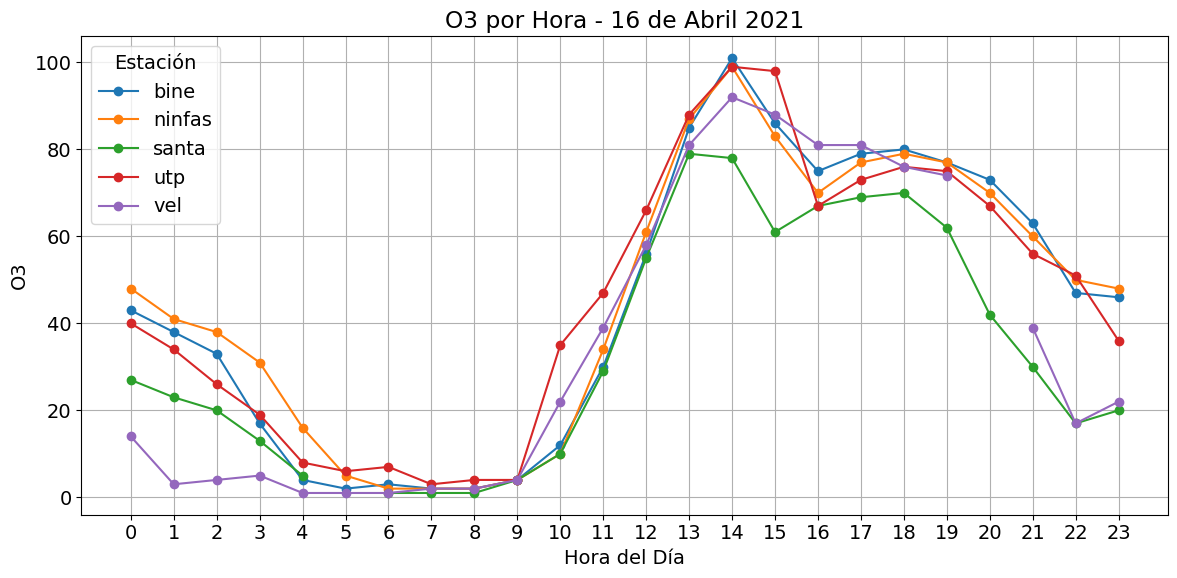

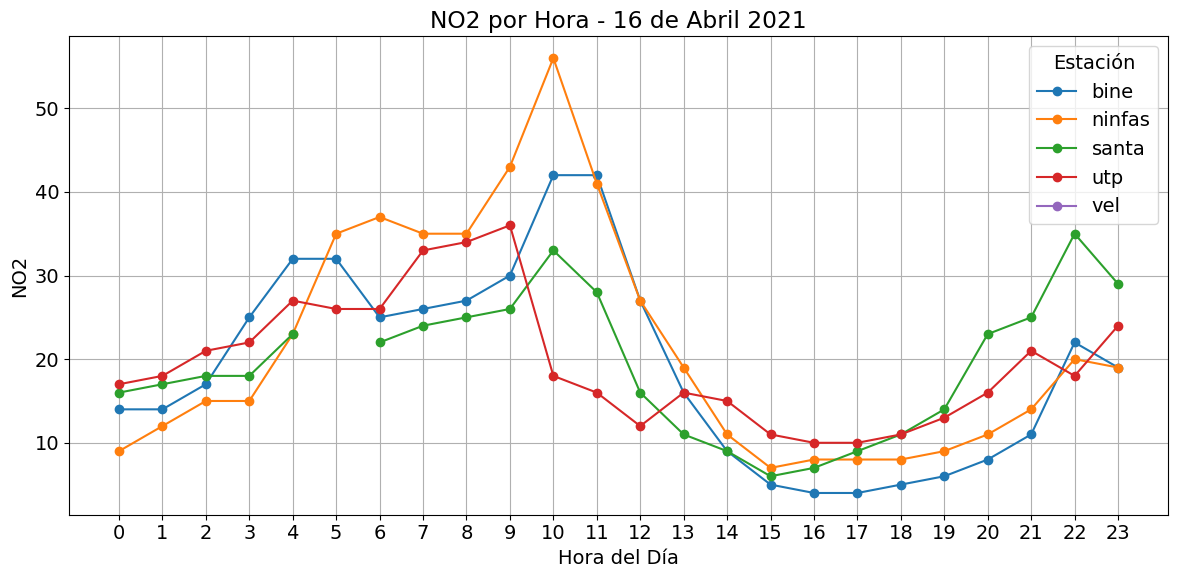

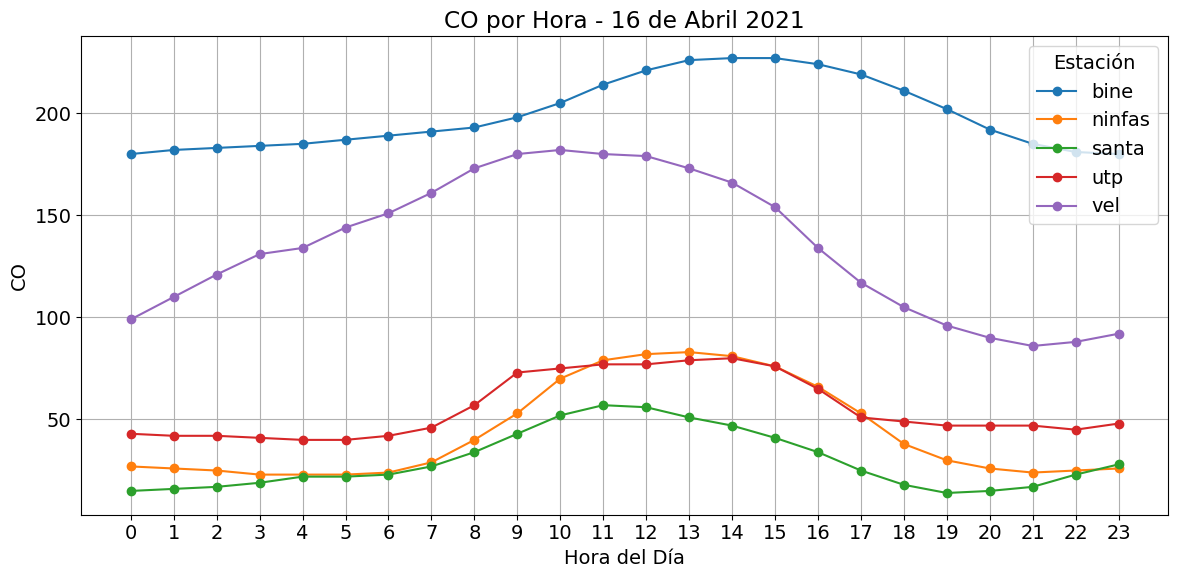

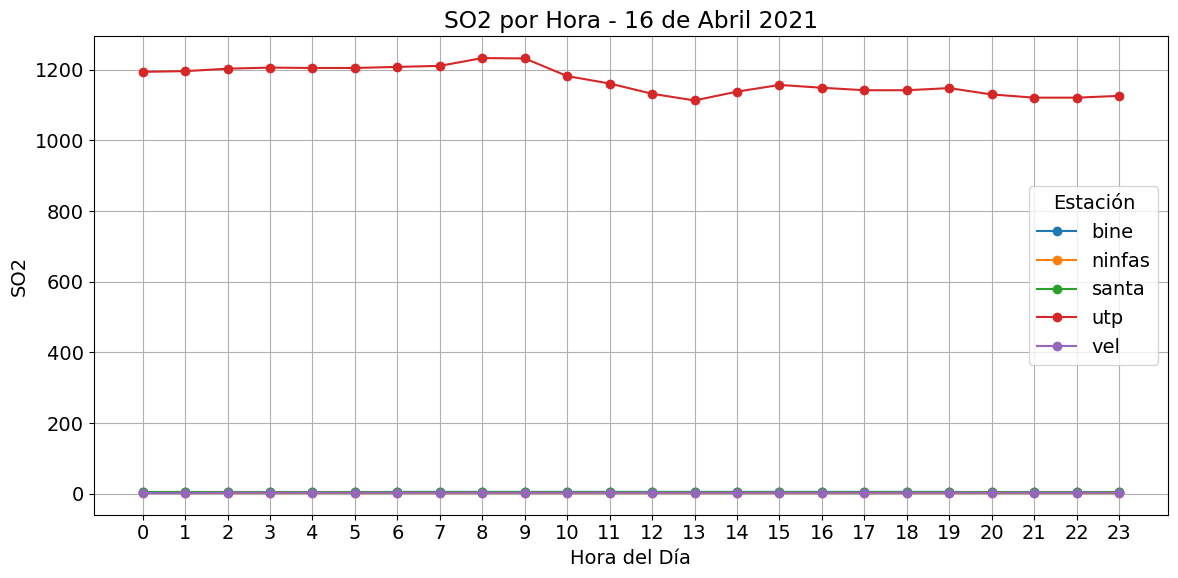

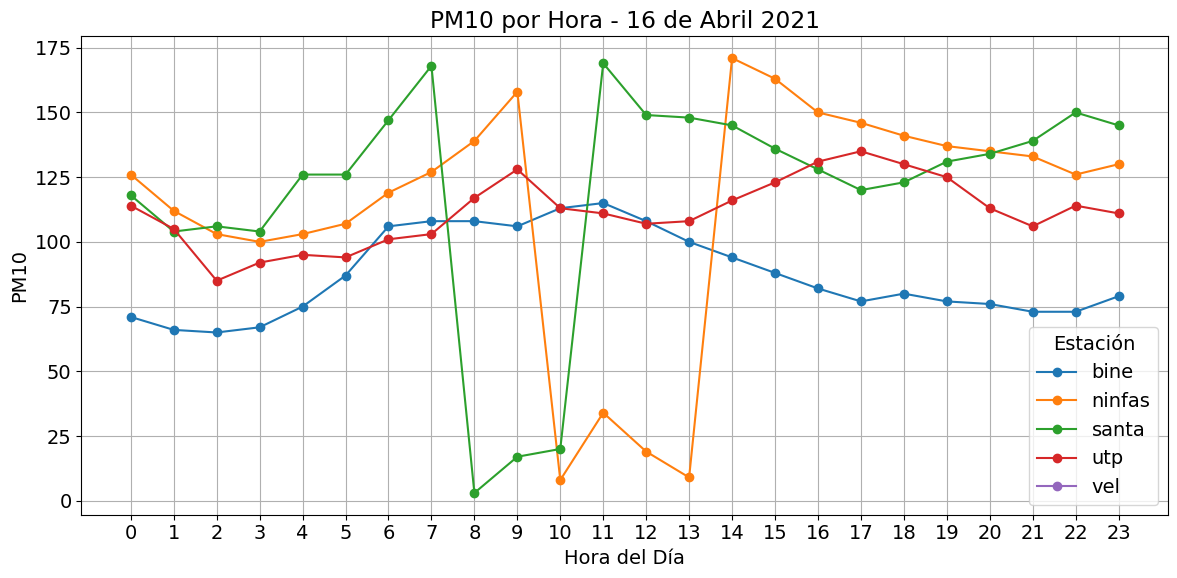

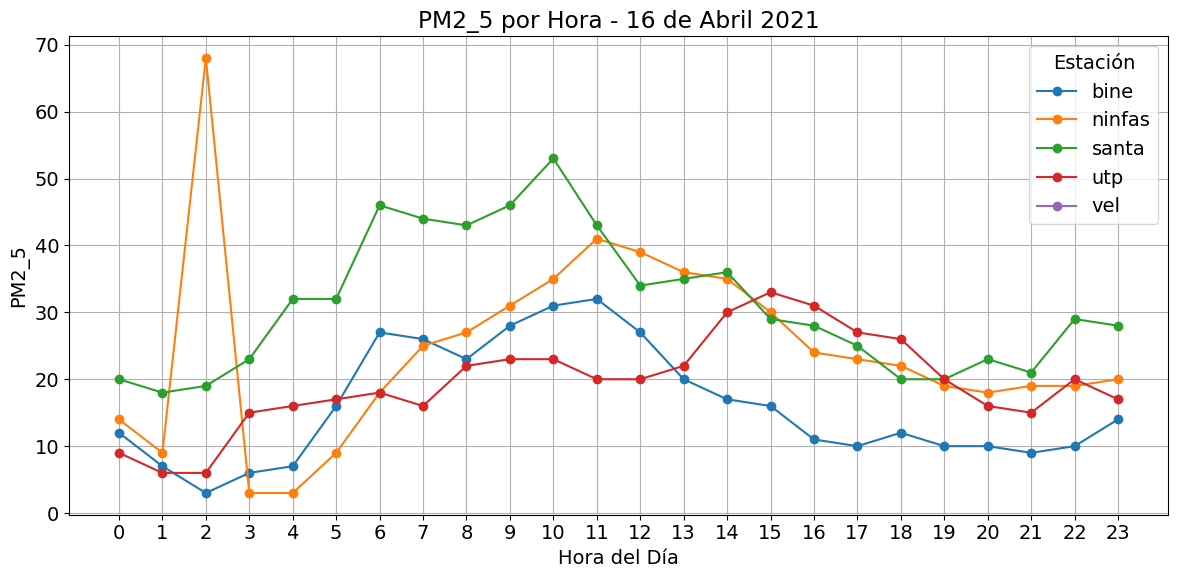

In [62]:
from datetime import datetime

# Filtrar datos del 17 de enero
selected_date = datetime(year, month, day)
df_selected_day = df[df['DateTime'].dt.date == selected_date.date()]

# Graficar evoluci√≥n horaria de cada contaminante en ese d√≠a
for contaminante in contaminantes:
    plt.figure(figsize=(12, 6))
    for estacion in df_selected_day['Estacion'].unique():
        data = df_selected_day[df_selected_day['Estacion'] == estacion]
        plt.plot(data['Hora'], data[contaminante], marker='o', label=estacion)

    plt.title(f'{contaminante} por Hora - {day} de {month_name(month)} {year}')
    plt.xlabel('Hora del D√≠a')
    plt.ylabel(contaminante)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend(title='Estaci√≥n')
    plt.tight_layout()
    plt.show()

# üìä An√°lisis del 17 de enero de 2023 (d√≠a cr√≠tico)

- O‚ÇÉ: se mantiene bajo durante todo el d√≠a, como es t√≠pico en d√≠as con alta concentraci√≥n de contaminantes primarios (inversi√≥n t√©rmica puede inhibir su formaci√≥n).

- NO‚ÇÇ y CO: presentan picos pronunciados en la ma√±ana (7‚Äì10‚ÄØh) y tarde (18‚Äì21‚ÄØh), especialmente en vel, santa y utp, alineado con patrones de tr√°fico.

- SO‚ÇÇ: sube en la madrugada y se mantiene estable, con vel nuevamente como estaci√≥n dominante.

- PM10 y PM2.5: niveles muy altos y sostenidos todo el d√≠a, sobre todo en santa y vel, superando con facilidad umbrales cr√≠ticos.

Este d√≠a refleja un evento de contaminaci√≥n generalizada, probablemente causado por una combinaci√≥n de alta actividad urbana, condiciones meteorol√≥gicas desfavorables y fuentes fijas/m√≥viles activas.

In [63]:
resultados = {}

for contaminante, serie in high_pollution_days.items():
    fecha_min = serie.idxmin()  # obtiene la fecha del valor m√≠nimo
    valor_min = serie.min()     # obtiene el valor m√≠nimo
    resultados[contaminante] = (fecha_min, valor_min)

# Mostrar los resultados
for k, v in resultados.items():
    print(f"{k}: D√≠a con menor concentraci√≥n fue {v[0]} con un valor de {v[1]}")
    if k == 'O3':
        o3 = v[0]

# Supongamos que `o3` es una fecha tipo datetime.date o Timestamp
year_clean = o3.year
month_clean = o3.month
day_clean = o3.day

print("Fecha limpia para O3:")
print(year_clean, month_clean, day_clean)


O3: D√≠a con menor concentraci√≥n fue 2021-04-08 con un valor de 31
NO2: D√≠a con menor concentraci√≥n fue 2021-12-09 con un valor de 20
CO: D√≠a con menor concentraci√≥n fue 2021-10-26 con un valor de 24
SO2: D√≠a con menor concentraci√≥n fue 2021-07-27 con un valor de 24
PM10: D√≠a con menor concentraci√≥n fue 2021-02-21 con un valor de 19
PM2_5: D√≠a con menor concentraci√≥n fue 2021-06-11 con un valor de 11
Fecha limpia para O3:
2021 4 8


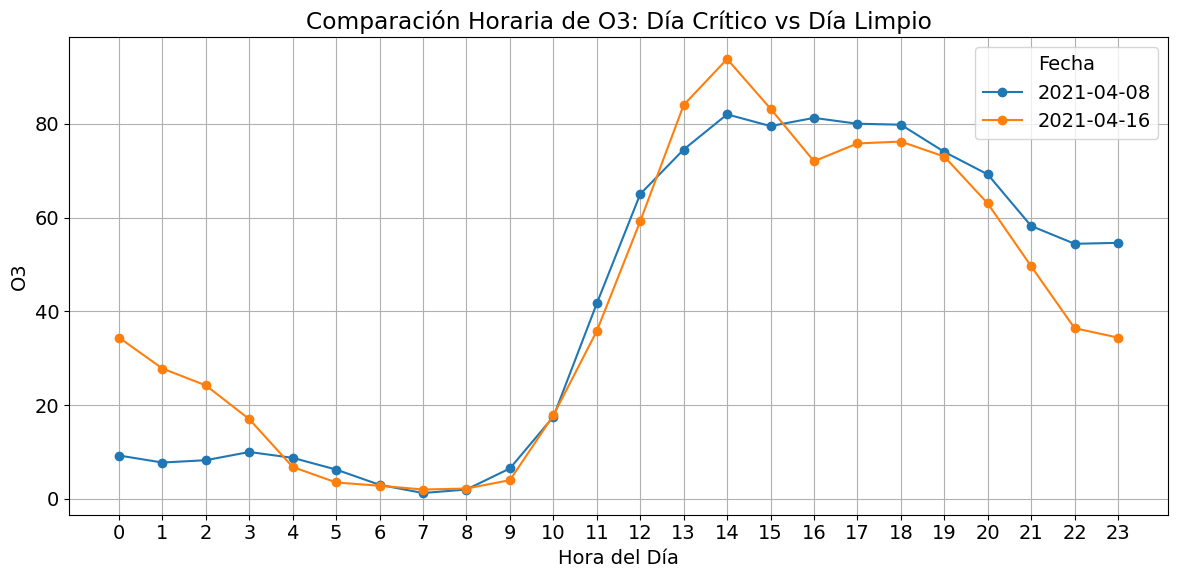

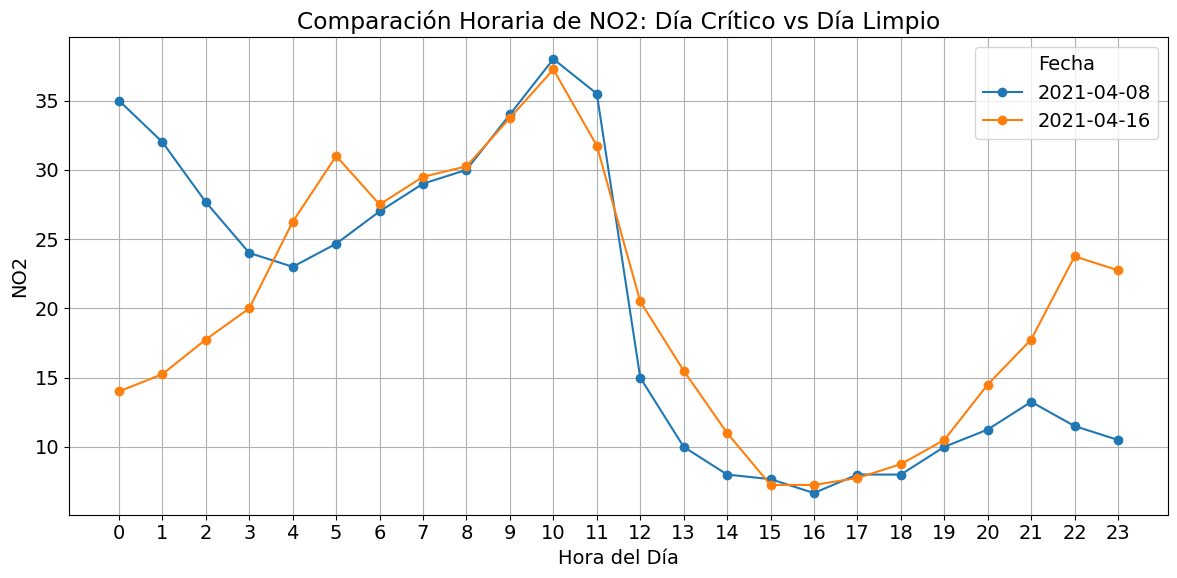

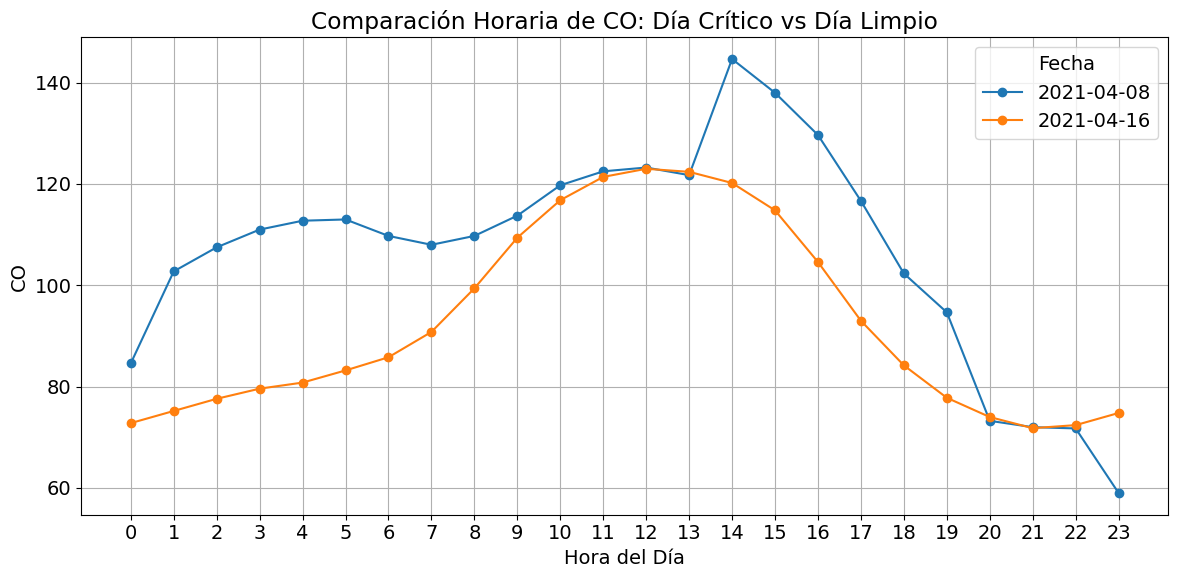

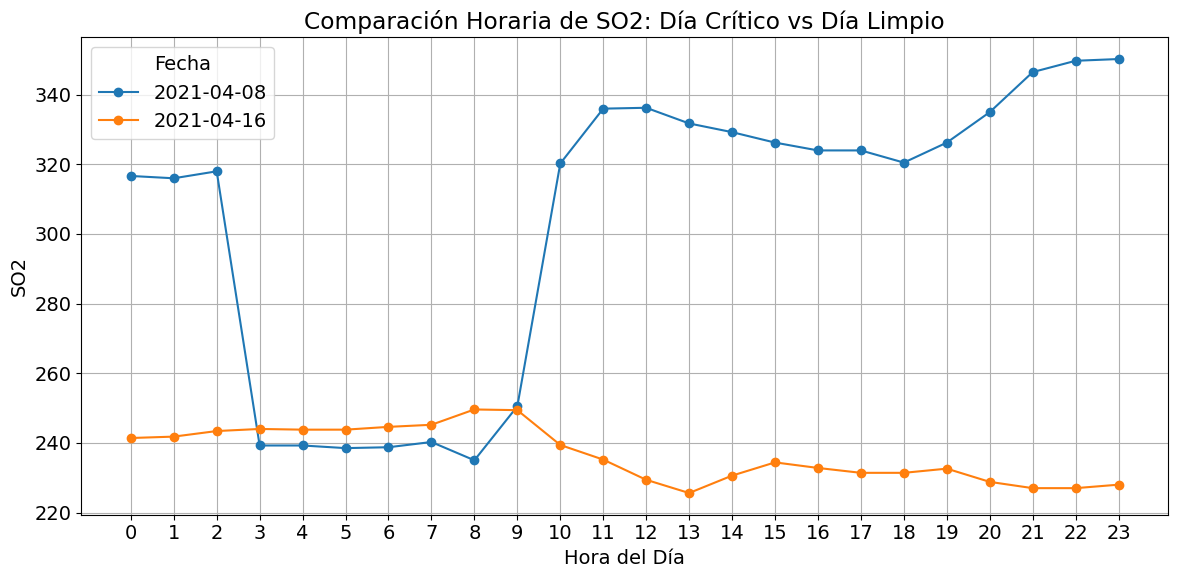

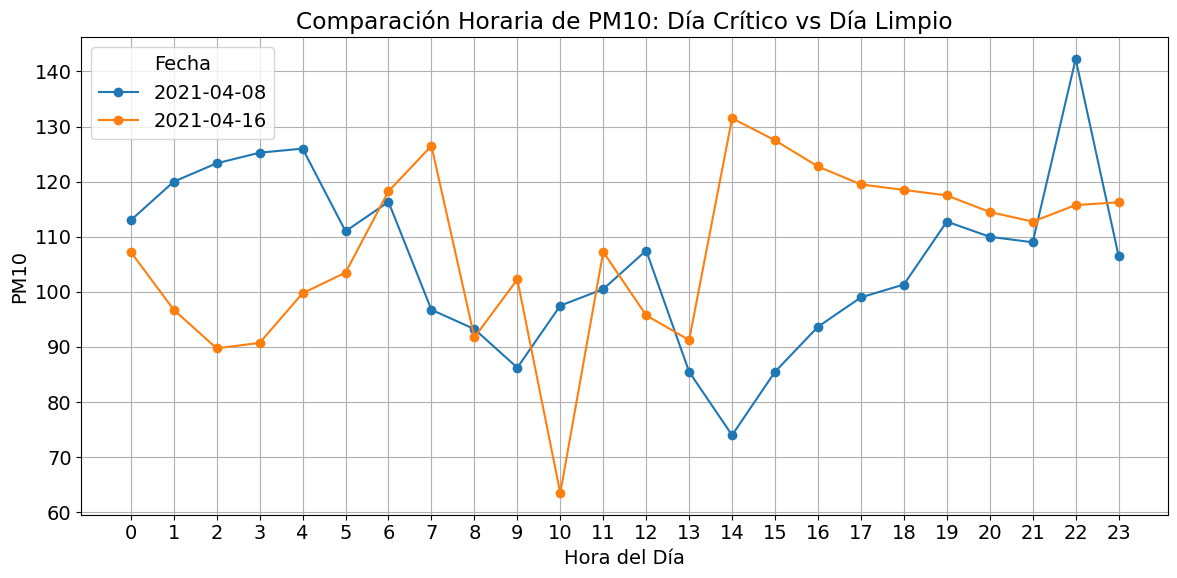

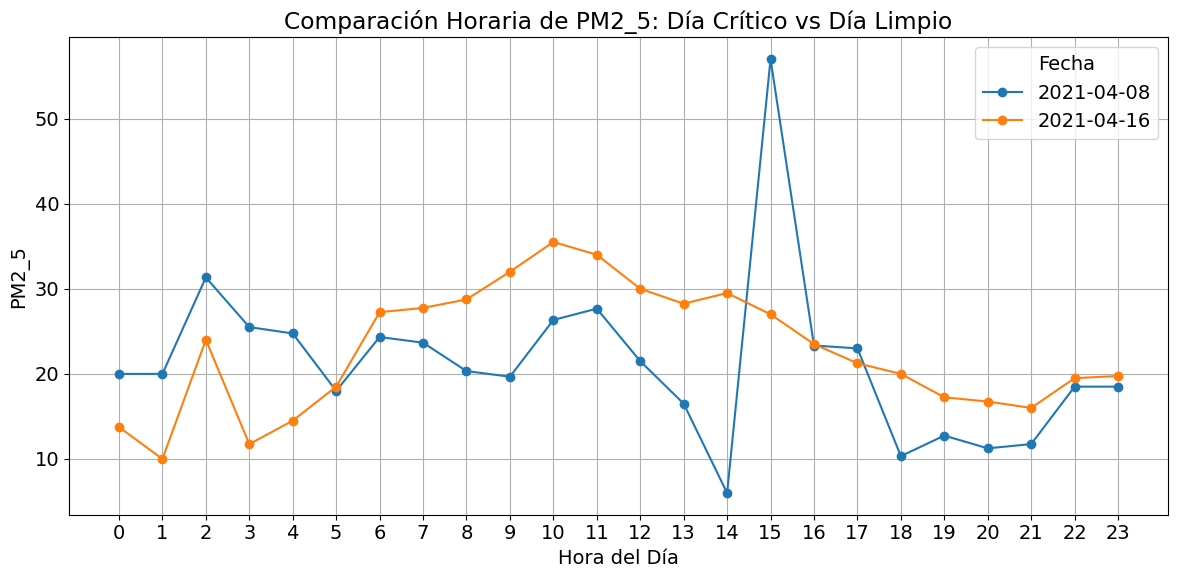

In [64]:
# Filtrar ambos d√≠as
df['Fecha'] = df['DateTime'].dt.date
comparison_days = df[df['Fecha'].isin([datetime(year, month, day).date(), datetime(year_clean, month_clean, day_clean).date()])]

# Graficar comparaci√≥n para cada contaminante
for contaminante in contaminantes:
    plt.figure(figsize=(12, 6))
    for fecha in comparison_days['Fecha'].unique():
        data = comparison_days[comparison_days['Fecha'] == fecha]
        promedio_hora = data.groupby('Hora')[contaminante].mean()
        plt.plot(promedio_hora.index, promedio_hora.values, marker='o', label=str(fecha))

    plt.title(f'Comparaci√≥n Horaria de {contaminante}: D√≠a Cr√≠tico vs D√≠a Limpio')
    plt.xlabel('Hora del D√≠a')
    plt.ylabel(contaminante)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend(title='Fecha')
    plt.tight_layout()
    plt.show()


# üìä Comparaci√≥n: 17 de enero (cr√≠tico) vs 8 de octubre (limpio)

- O‚ÇÉ: M√°s alto en el d√≠a limpio (octubre), lo cual es t√≠pico; la formaci√≥n de ozono se ve inhibida en d√≠as con mucha concentraci√≥n de contaminantes primarios.

- NO‚ÇÇ, CO, SO‚ÇÇ: Claramente m√°s elevados en el d√≠a cr√≠tico, con picos definidos en las horas punta (7‚Äì10‚ÄØh y 18‚Äì21‚ÄØh).

- PM10 y PM2.5:

    - D√≠a cr√≠tico: niveles altos sostenidos todo el d√≠a, especialmente en la ma√±ana.
    - D√≠a limpio: valores significativamente menores y m√°s estables.

Esta comparaci√≥n refuerza que el 17 de enero fue un episodio severo de contaminaci√≥n multisectorial, mientras que 8 de octubre refleja condiciones normales o favorables para la calidad del aire.